<a href="https://colab.research.google.com/github/taaha3244/HandsOnML/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
mnist=fetch_openml('mnist_784',version=1,as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X=mnist['data']
y=mnist['target']
X.shape,y.shape

((70000, 784), (70000,))

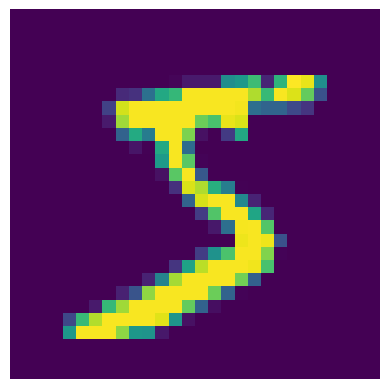

In [50]:
number=X[0]
img=number.reshape(28,28)
plt.imshow(img)
plt.axis(False)
plt.show()

In [5]:
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [9]:
#checking or predictiong our 5 image named as number
sgd_clf.predict([number])

array([ True])

In [10]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=3,shuffle=True
                    ,random_state=42)

In [11]:
for batch,(train_index,test_index) in enumerate(skf.split(X,y)):
  print(f'Fold{batch}')
  print(f'Train:index={train_index}')
  print(f'Test:index={test_index}')


Fold0
Train:index=[    0     2     3 ... 69993 69994 69995]
Test:index=[    1    14    16 ... 69997 69998 69999]
Fold1
Train:index=[    0     1     3 ... 69997 69998 69999]
Test:index=[    2     5     7 ... 69980 69992 69994]
Fold2
Train:index=[    1     2     5 ... 69997 69998 69999]
Test:index=[    0     3     4 ... 69991 69993 69995]


In [12]:
from sklearn.base import clone
for train_index,test_index in skf.split(X_train,y_train_5):
  clf_clone=clone(sgd_clf)
  X_train_folds=X_train[train_index]
  y_train_folds=y_train_5[train_index]
  X_test_fold=X_train[test_index]
  y_test_fold=y_train_5[test_index]

  clf_clone.fit(X_train_folds,y_train_folds)
  y_pred=clf_clone.predict(X_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print(n_correct/len(y_pred))

0.9669
0.91625
0.96785


In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [14]:
np.zeros((len(X),1),dtype=bool)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [15]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
 def fit(self, X, y=None):
  pass
 def predict(self, X):
  return np.zeros((len(X), 1), dtype=bool)

In [16]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]])

In [19]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]])

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)

recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)

0.6511713705958311

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [22]:
y_scores=sgd_clf.decision_function([number])
y_scores

array([2164.22030239])

In [23]:
threshold=2200
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [24]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [25]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


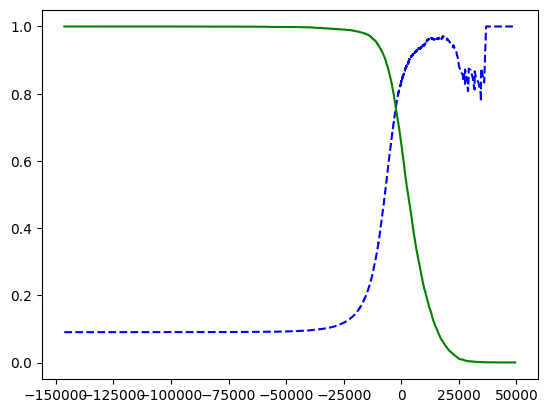

In [26]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


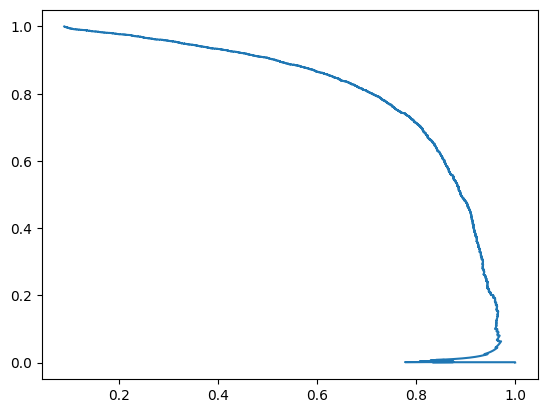

In [27]:
plt.plot(precisions[:-1],recalls[:-1])

In [28]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [29]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [30]:
pre=precision_score(y_train_5, y_train_pred_90)
rec=recall_score(y_train_5, y_train_pred_90)
pre,rec


(0.9000345901072293, 0.4799852425751706)

In [31]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)
thresholds

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

In [32]:
def plot_roc_curve(tpr,fpr):
  plt.plot(fpr,tpr,linewidth=2,label=y)
  plt.plot([0,1],[0,1],'k--')

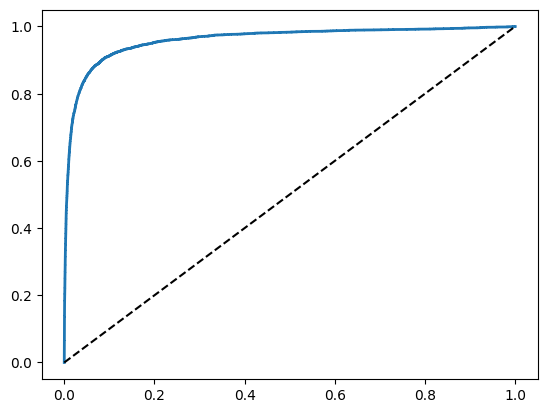

In [33]:
plot_roc_curve(tpr,fpr)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
forest_clf=RandomForestClassifier()

In [36]:
y_pred_probs=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

In [43]:
y_scores_forest=y_pred_probs[:,1]
print(y_scores)
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


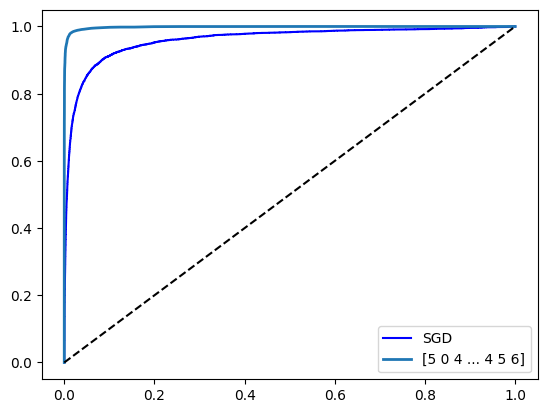

In [45]:
plt.plot(fpr,tpr,'b',label='SGD')
plot_roc_curve(tpr_forest,fpr_forest)
plt.legend(loc='lower right')

In [48]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [49]:
sgd_clf.predict([number])

array([3], dtype=uint8)

In [53]:
some_digit_score=sgd_clf.decision_function([number])
some_digit_score

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [54]:
np.argmax(some_digit_score)

3